## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%run /content/drive/MyDrive/Ucamp/Functions.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# No hay necesidad de hacer dummies
df = pd.read_csv('/content/drive/MyDrive/Ucamp/Modulo4/costumers.csv')
df.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB
None

Estadísticas descriptivas:
            Salario  Credito_tipo_1  Credito_tipo_2      Limite_TC  \
count    500.000000      500.000000      500.000000     500.000000   
mean   12089.097380        0.610000        0.458000   44784.554960   
std     5123.700116        0.488238        0.498732   22150.923996   
min    -2911.650000        0.000000        0.000000  -22207.950000   
25%     8534.350000        0.000000        

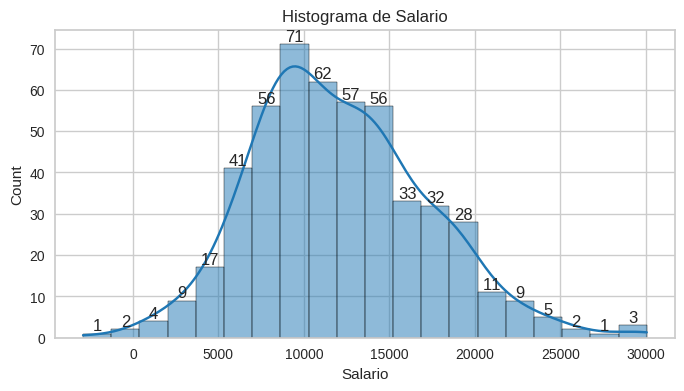

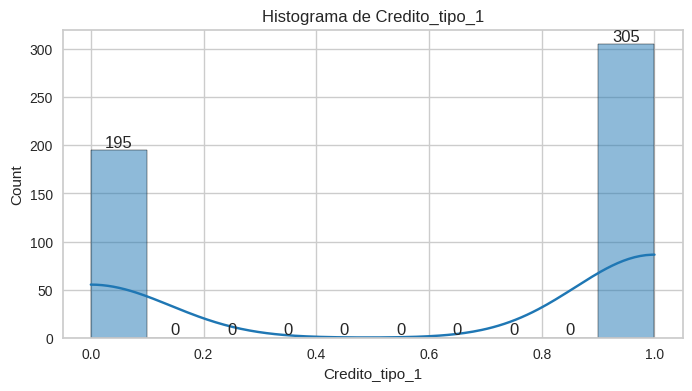

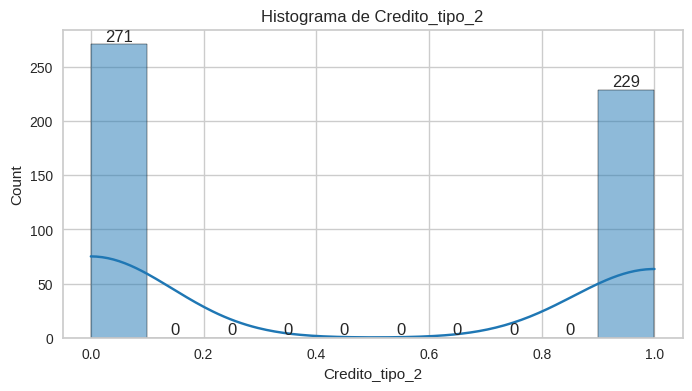

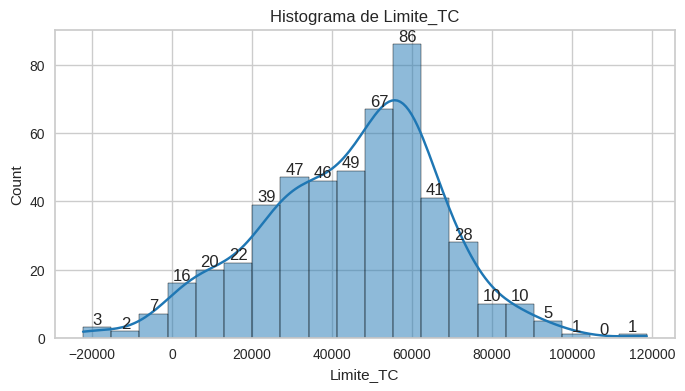

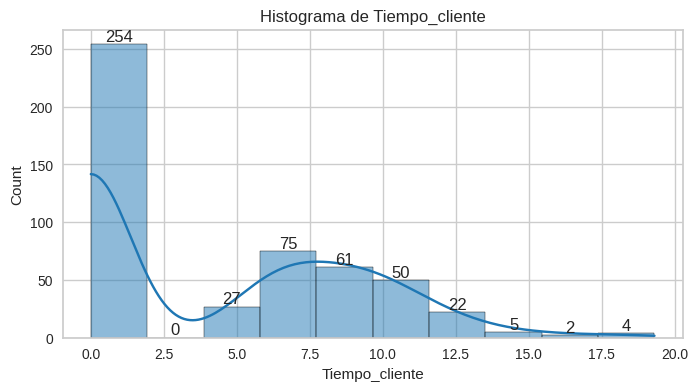

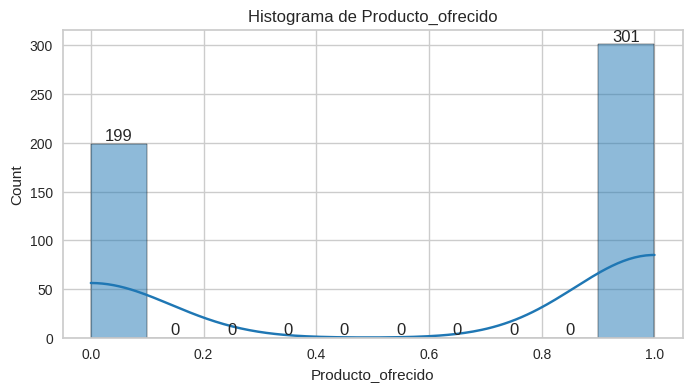


Matriz de Correlación:


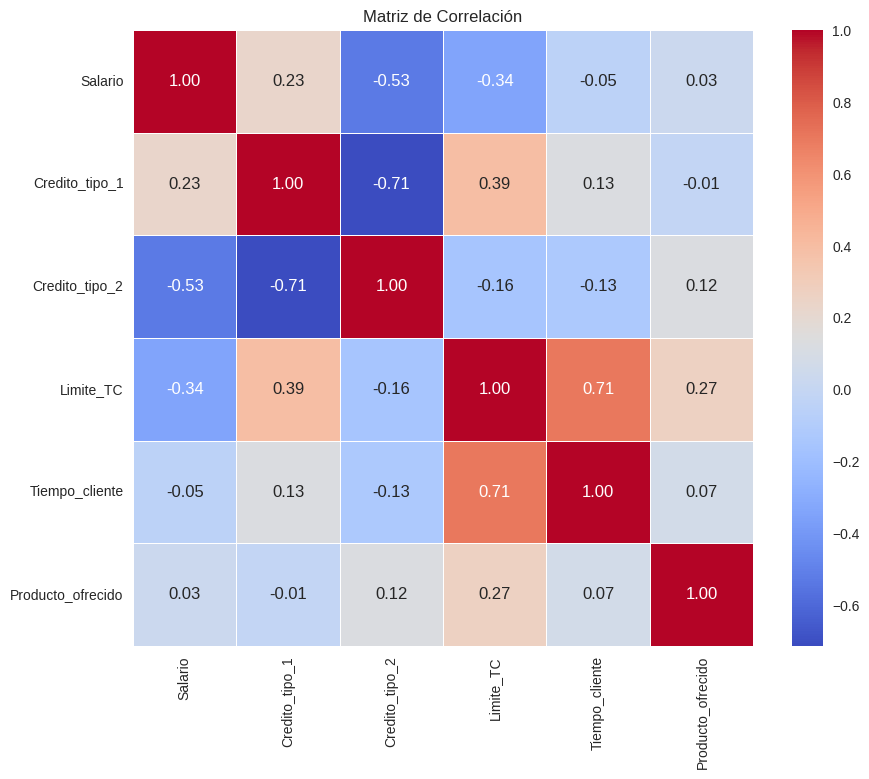

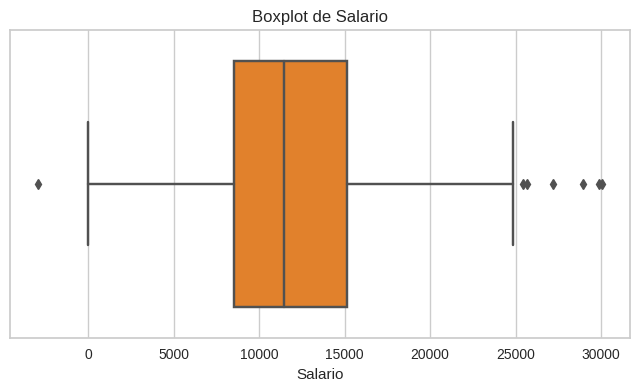

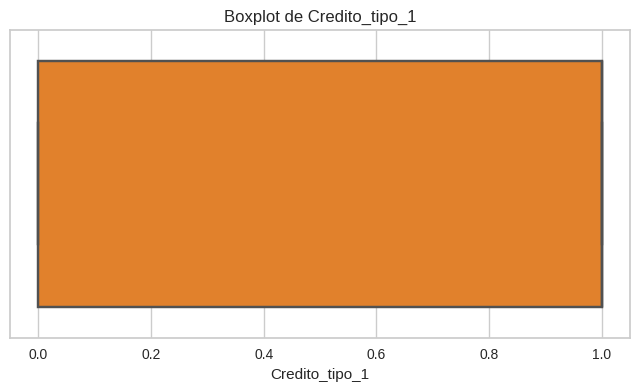

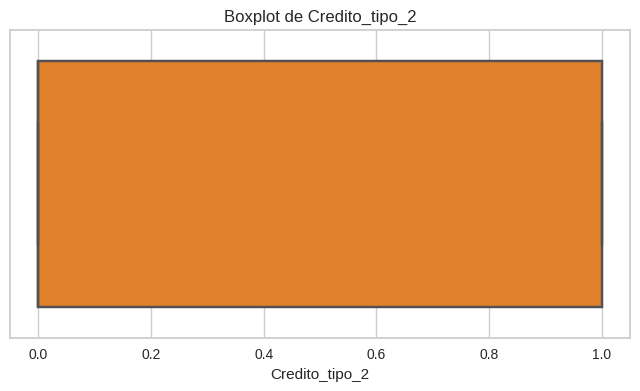

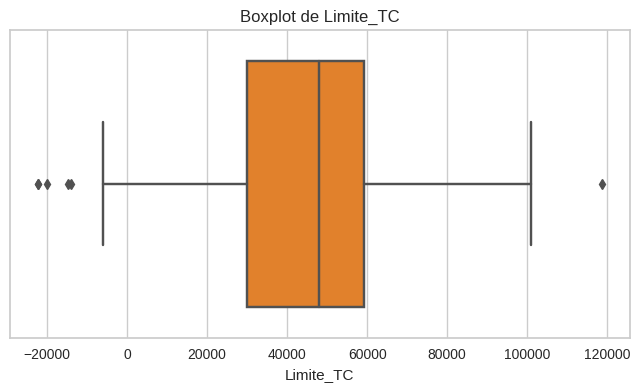

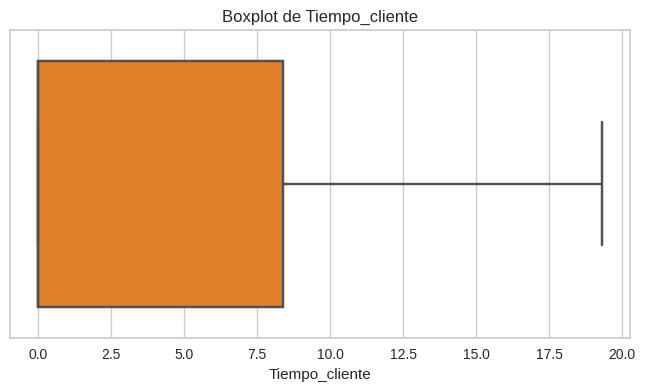

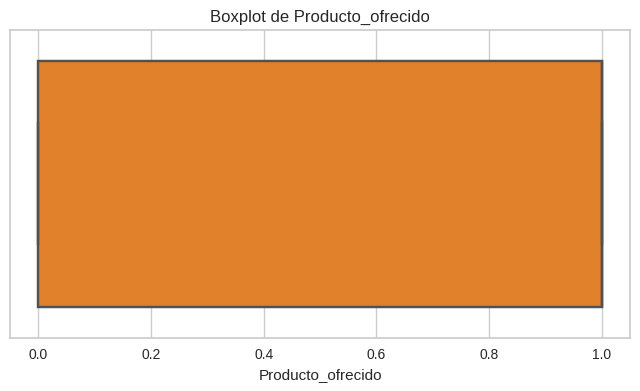


Matriz de Dispersión para Multicolinealidad Visual:


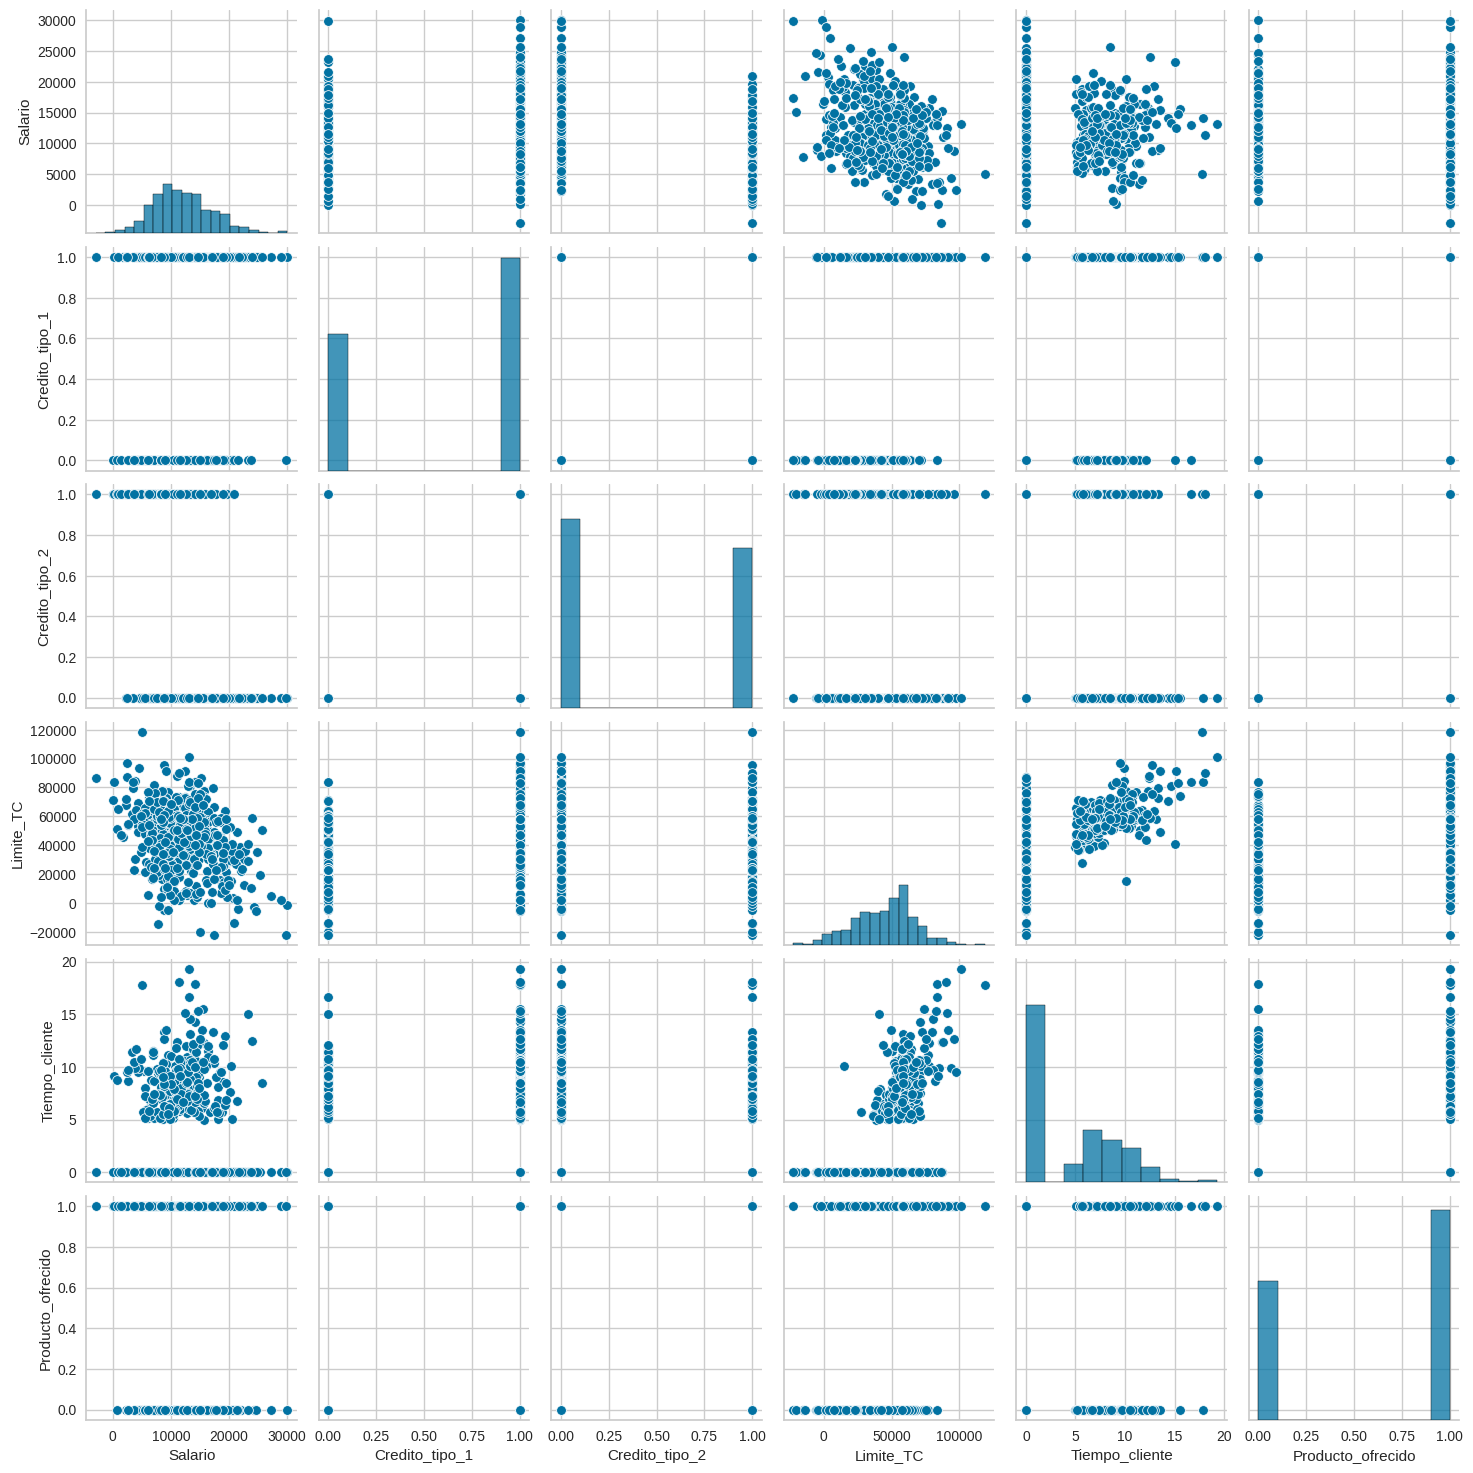

In [ ]:
# Completitud 100%, no hay correlaciones atas en las variables por lo que mantenemos todas.
realizar_eda(df)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salario,500.0,12089.09738,5123.700116,-2911.65,8534.350,11438.600,15171.4675,30041.40
Credito_tipo_1,500.0,0.61000,0.488238,0.00,0.000,1.000,1.0000,1.00
Credito_tipo_2,500.0,0.45800,0.498732,0.00,0.000,0.000,1.0000,1.00
Limite_TC,500.0,44784.55496,22150.923996,-22207.95,30096.285,47991.515,59108.1750,118636.82
Tiempo_cliente,500.0,4.32700,4.784776,0.00,0.000,0.000,8.4000,19.30
Producto_ofrecido,500.0,0.60200,0.489976,0.00,0.000,1.000,1.0000,1.00


In [ ]:
#Aca generamos la transformacion PCA, luego calculamos la va
pca = PCA(n_components=2)
df1 = pca.fit_transform(df)
exp_var_pca = pca.explained_variance_ratio_
print(f"Cada columna tiene el siguiente porcentaje de explicacion respectivamente:{exp_var_pca}")
radios = np.linalg.norm(df1, axis=1)

for i, radio in enumerate(radios):
    print(f"Dato numero {i + 1} transformado: {radio}")

Cada columna tiene el siguiente porcentaje de explicacion respectivamente:[0.95543853 0.04456145]
Dato numero 1 transformado: 18013.01787891474
Dato numero 2 transformado: 8962.338447390539
Dato numero 3 transformado: 26724.780810111955
Dato numero 4 transformado: 14066.172320162452
Dato numero 5 transformado: 24787.112865261774
Dato numero 6 transformado: 15316.394266528188
Dato numero 7 transformado: 26174.70008199789
Dato numero 8 transformado: 4920.358904148465
Dato numero 9 transformado: 13075.671009343385
Dato numero 10 transformado: 8455.40341853184
Dato numero 11 transformado: 42712.95924552548
Dato numero 12 transformado: 19081.38137582103
Dato numero 13 transformado: 14771.557474628275
Dato numero 14 transformado: 16885.55267140233
Dato numero 15 transformado: 15921.017781120729
Dato numero 16 transformado: 7297.03362853401
Dato numero 17 transformado: 14694.082982981034
Dato numero 18 transformado: 24588.613754615726
Dato numero 19 transformado: 39730.76355137413
Dato numero

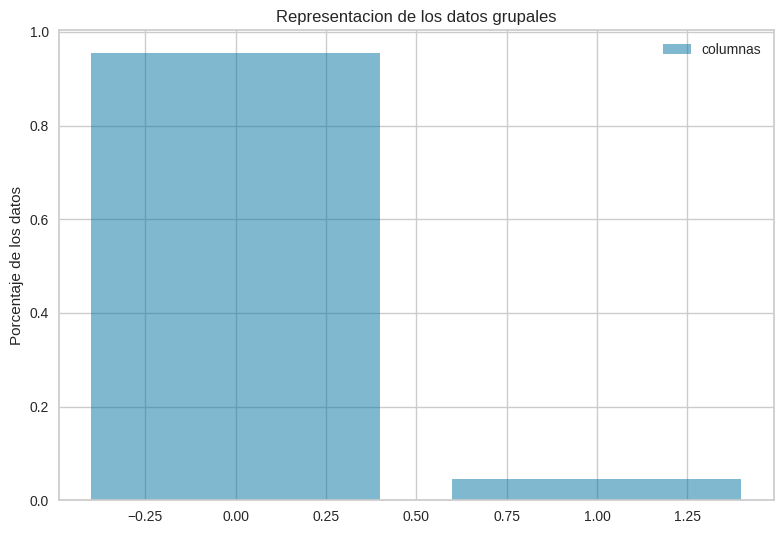

In [ ]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='columnas')
plt.ylabel('Porcentaje de los datos')
plt.title('Representacion de los datos grupales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

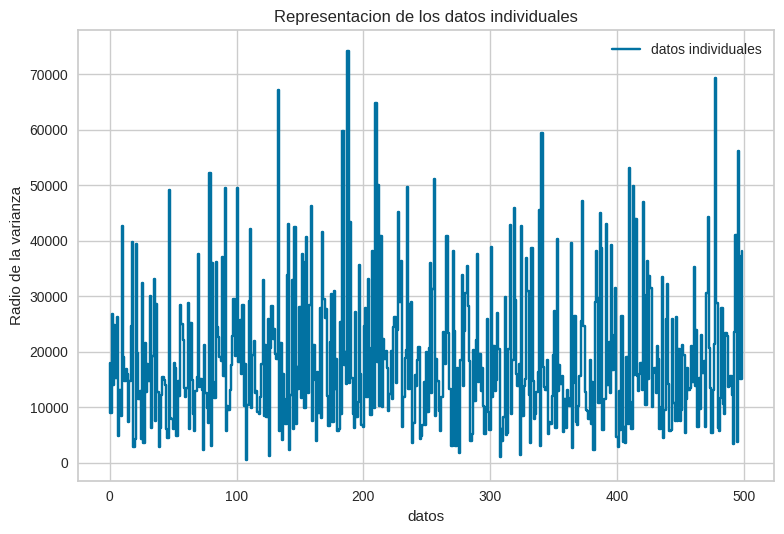

In [ ]:
plt.step(range(0,len(radios)), radios, where='mid',label='datos individuales')
plt.ylabel('Radio de la varianza')
plt.xlabel('datos')
plt.title('Representacion de los datos individuales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

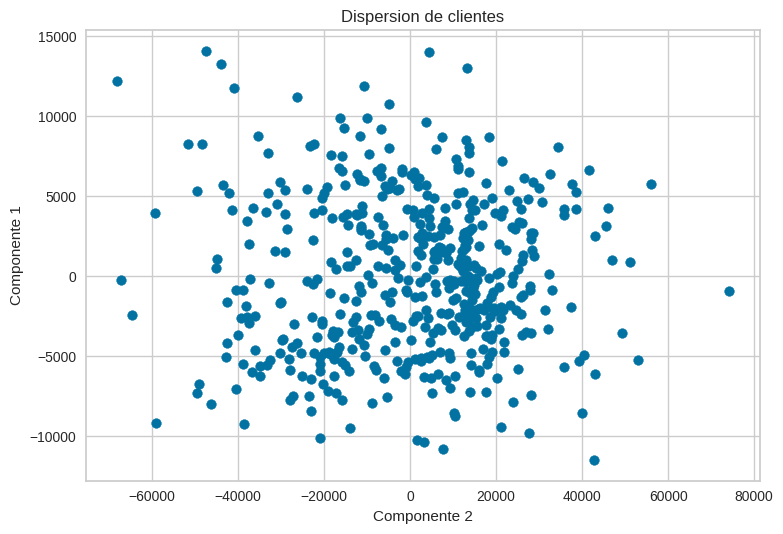

In [ ]:
df1_feature1 = df1[:,0]
df1_feature2 = df1[:,1]
plt.scatter(df1_feature1, df1_feature2)
plt.title("Dispersion de clientes")
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')
plt.tight_layout()
plt.show()

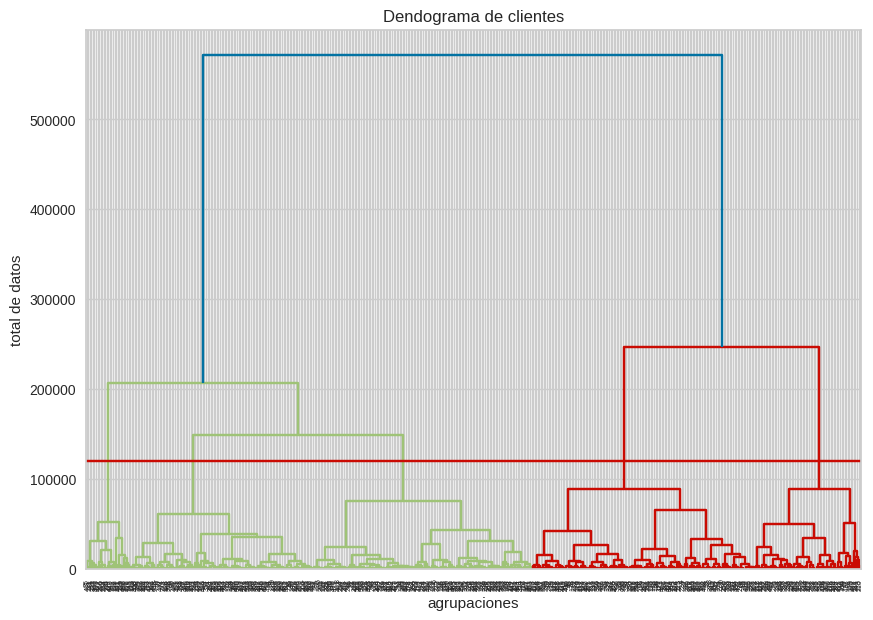

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel('total de datos')
plt.xlabel('agrupaciones')
clusters = shc.linkage(df,
            method='ward',
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 120000, color = 'r', linestyle = '-')

In [ ]:
#Podemos ver que el cluster 5 es el mas indicado puesto que tiene el indice de calinski mas alto y un davis reativamente bajo en comparacion con los demas
for i in range(2,21):
  hc = AgglomerativeClustering(n_clusters = i, affinity = "euclidean", linkage = "ward")
  labels = hc.fit_predict(df)
  Silueta = metrics.silhouette_score(df, labels)
  Calinski_Harabasz = metrics.calinski_harabasz_score(df, labels)
  Davies_Bouldin = metrics.davies_bouldin_score(df, labels)
  Silueta = round(Silueta, 3)
  Calinski_Harabasz = round(Calinski_Harabasz, 3)
  Davies_Bouldin = round(Davies_Bouldin, 3)
  print(f'{i} grupos; silueta = {Silueta}, Calinski-Harabasz = {Calinski_Harabasz}, Davies-Bouldin = {Davies_Bouldin}')

2 grupos; silueta = 0.543, Calinski-Harabasz = 858.102, Davies-Bouldin = 0.637
3 grupos; silueta = 0.478, Calinski-Harabasz = 749.976, Davies-Bouldin = 0.653
4 grupos; silueta = 0.464, Calinski-Harabasz = 828.335, Davies-Bouldin = 0.63
5 grupos; silueta = 0.395, Calinski-Harabasz = 876.577, Davies-Bouldin = 0.757
6 grupos; silueta = 0.373, Calinski-Harabasz = 812.195, Davies-Bouldin = 0.828
7 grupos; silueta = 0.336, Calinski-Harabasz = 799.186, Davies-Bouldin = 0.917
8 grupos; silueta = 0.29, Calinski-Harabasz = 783.711, Davies-Bouldin = 0.955
9 grupos; silueta = 0.298, Calinski-Harabasz = 768.847, Davies-Bouldin = 0.919
10 grupos; silueta = 0.317, Calinski-Harabasz = 762.46, Davies-Bouldin = 0.921
11 grupos; silueta = 0.311, Calinski-Harabasz = 746.13, Davies-Bouldin = 0.94
12 grupos; silueta = 0.308, Calinski-Harabasz = 740.408, Davies-Bouldin = 0.903
13 grupos; silueta = 0.315, Calinski-Harabasz = 745.387, Davies-Bouldin = 0.91
14 grupos; silueta = 0.318, Calinski-Harabasz = 740.09

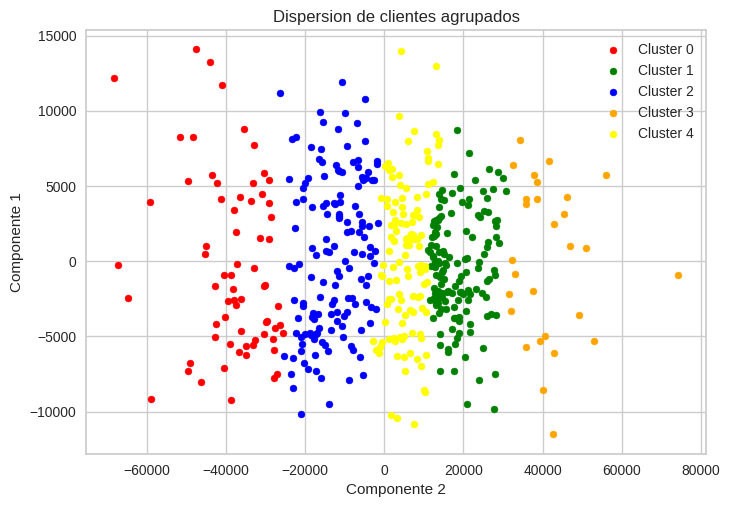

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(df)

plt.scatter(df1[y_hc == 0, 0], df1[y_hc == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(df1[y_hc == 1, 0], df1[y_hc == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(df1[y_hc == 2, 0], df1[y_hc == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.scatter(df1[y_hc == 3, 0], df1[y_hc == 3, 1], s = 100, marker= '.', c = "orange", label = "Cluster 3")
plt.scatter(df1[y_hc == 4, 0], df1[y_hc == 4, 1], s = 100, marker= '.', c = "yellow", label = "Cluster 4")
plt.title("Dispersion de clientes agrupados")
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')



plt.legend()
plt.show()

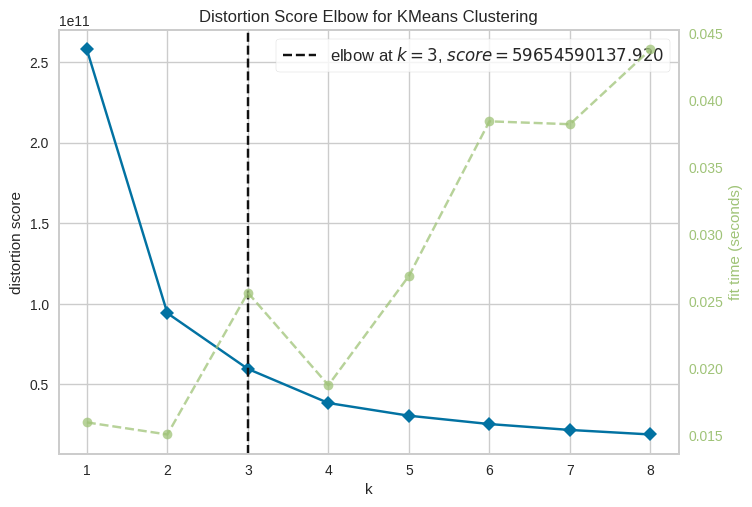

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Metodo del codo para kmean
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 9))

visualizer.fit(df)

visualizer.show()

In [ ]:
for i in range(2,21):
  kmeans = KMeans(n_clusters = i)
  labels = kmeans.fit_predict(df)
  Silueta = metrics.silhouette_score(df, labels)
  Calinski_Harabasz = metrics.calinski_harabasz_score(df, labels)
  Davies_Bouldin = metrics.davies_bouldin_score(df, labels)
  Silueta = round(Silueta, 3)
  Calinski_Harabasz = round(Calinski_Harabasz, 3)
  Davies_Bouldin = round(Davies_Bouldin, 3)
  print(f'k = {i}; silueta = {Silueta}, Calinski-Harabasz = {Calinski_Harabasz}, Davies-Bouldin = {Davies_Bouldin}')

k = 2; silueta = 0.548, Calinski-Harabasz = 864.875, Davies-Bouldin = 0.631
k = 3; silueta = 0.447, Calinski-Harabasz = 825.991, Davies-Bouldin = 0.705
k = 4; silueta = 0.456, Calinski-Harabasz = 943.022, Davies-Bouldin = 0.703
k = 5; silueta = 0.408, Calinski-Harabasz = 928.078, Davies-Bouldin = 0.749
k = 6; silueta = 0.385, Calinski-Harabasz = 903.238, Davies-Bouldin = 0.789
k = 7; silueta = 0.369, Calinski-Harabasz = 891.643, Davies-Bouldin = 0.827
k = 8; silueta = 0.367, Calinski-Harabasz = 886.217, Davies-Bouldin = 0.864
k = 9; silueta = 0.363, Calinski-Harabasz = 856.641, Davies-Bouldin = 0.863
k = 10; silueta = 0.372, Calinski-Harabasz = 840.603, Davies-Bouldin = 0.849
k = 11; silueta = 0.345, Calinski-Harabasz = 817.887, Davies-Bouldin = 0.857
k = 12; silueta = 0.345, Calinski-Harabasz = 799.874, Davies-Bouldin = 0.857
k = 13; silueta = 0.352, Calinski-Harabasz = 806.921, Davies-Bouldin = 0.878
k = 14; silueta = 0.351, Calinski-Harabasz = 814.052, Davies-Bouldin = 0.873
k = 15;

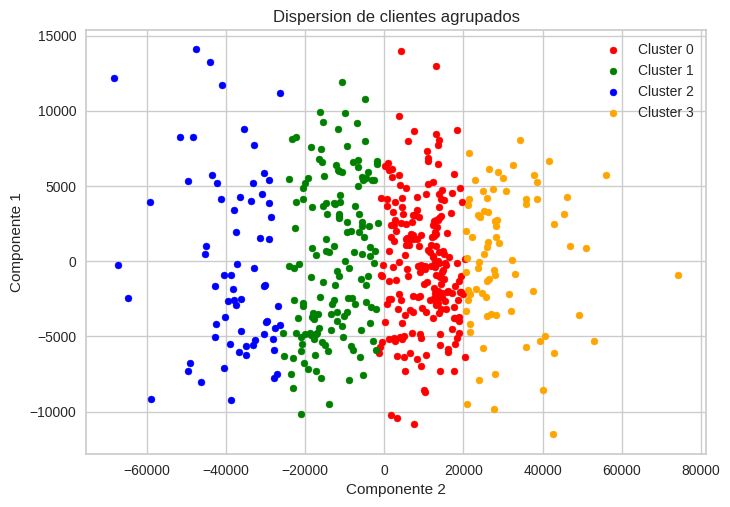

In [ ]:
kmeans = KMeans(n_clusters = 4)
y_hc = kmeans.fit_predict(df)

plt.scatter(df1[y_hc == 0, 0], df1[y_hc == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(df1[y_hc == 1, 0], df1[y_hc == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(df1[y_hc == 2, 0], df1[y_hc == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.scatter(df1[y_hc == 3, 0], df1[y_hc == 3, 1], s = 100, marker= '.', c = "orange", label = "Cluster 3")
plt.title("Dispersion de clientes agrupados")
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')


plt.legend()
plt.show()

### Aqui agregamos los 50 datos mas

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Ucamp/Modulo4/new_costumer.csv')
df2.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB
None

Estadísticas descriptivas:
            Salario  Credito_tipo_1  Credito_tipo_2      Limite_TC  \
count    500.000000      500.000000      500.000000     500.000000   
mean   12089.097380        0.610000        0.458000   44784.554960   
std     5123.700116        0.488238        0.498732   22150.923996   
min    -2911.650000        0.000000        0.000000  -22207.950000   
25%     8534.350000        0.000000        

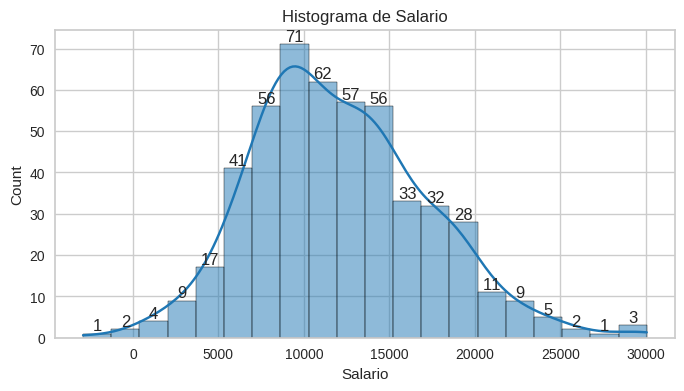

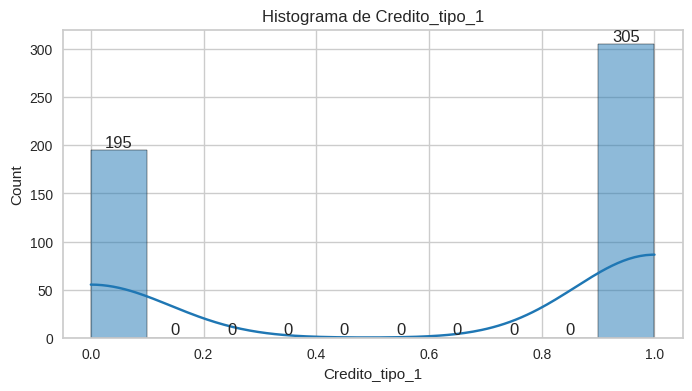

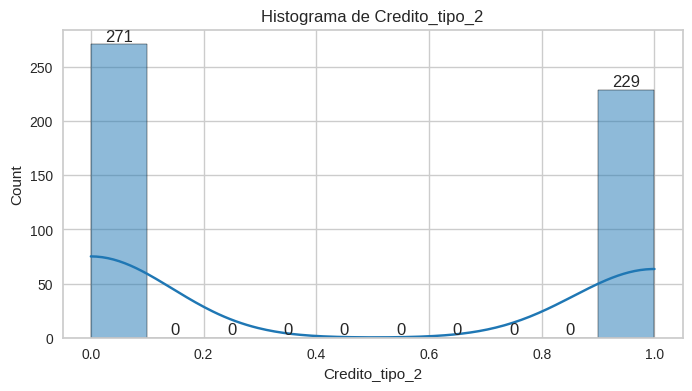

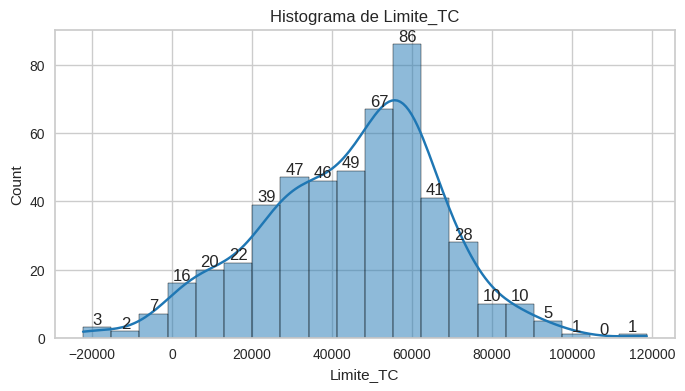

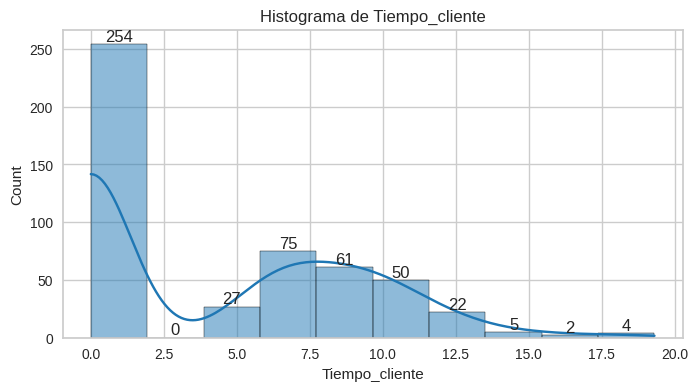

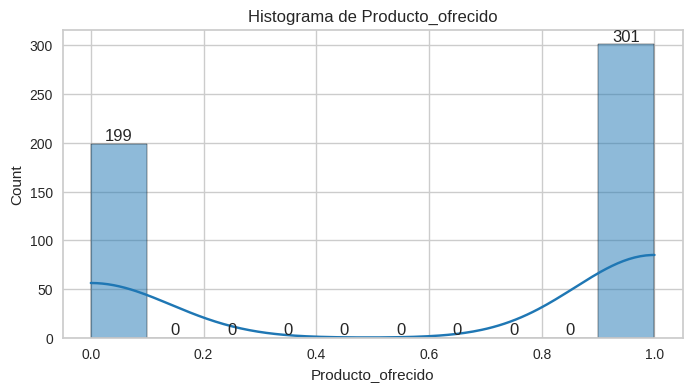


Matriz de Correlación:


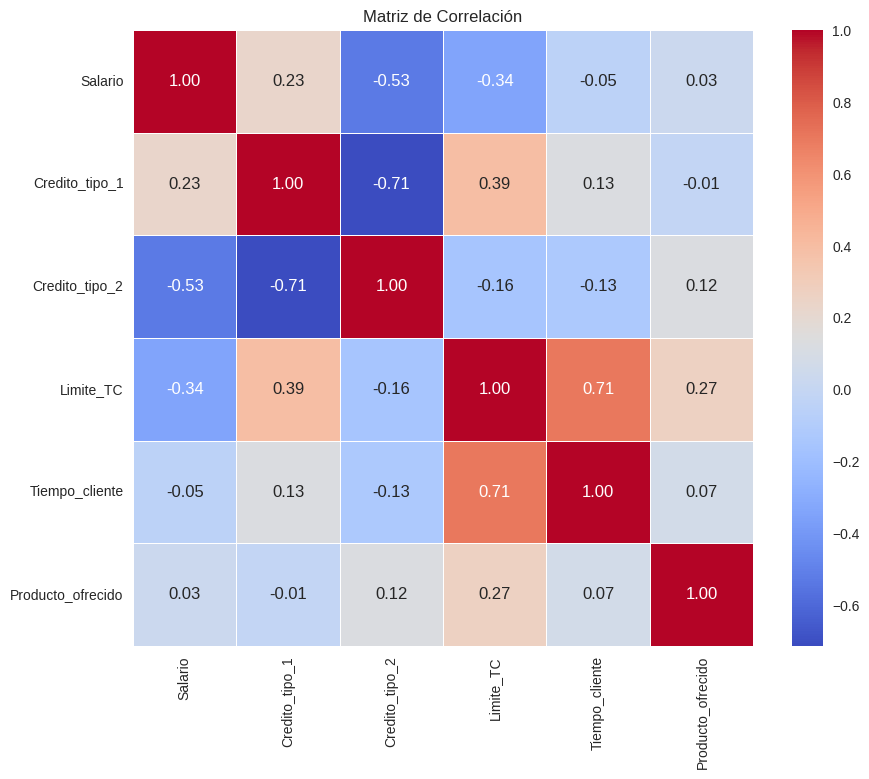

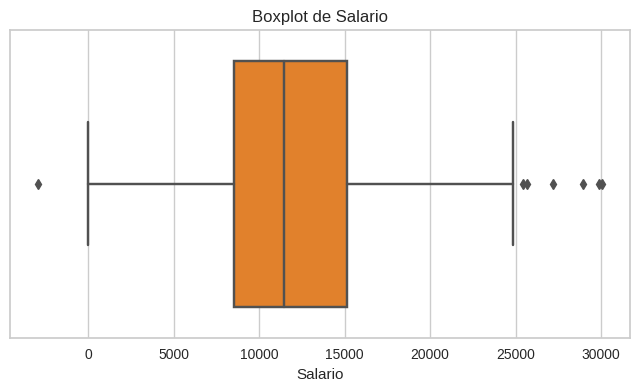

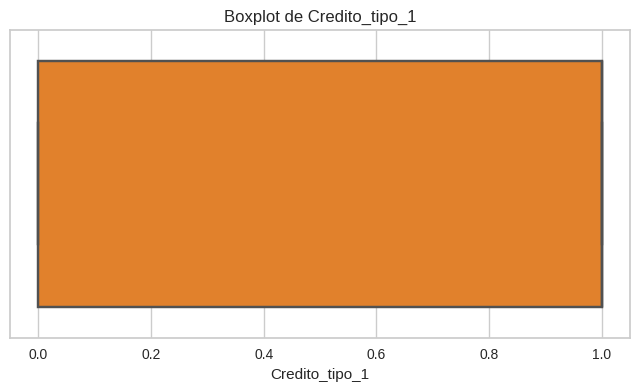

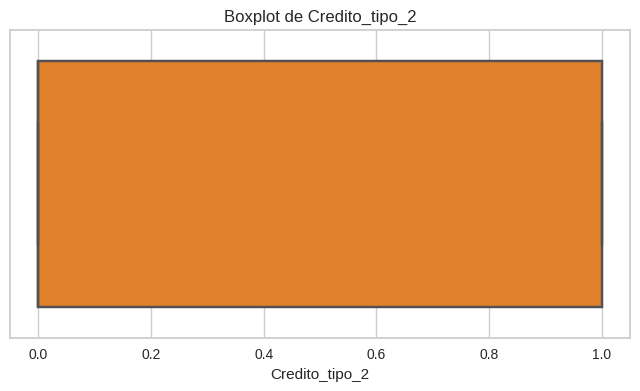

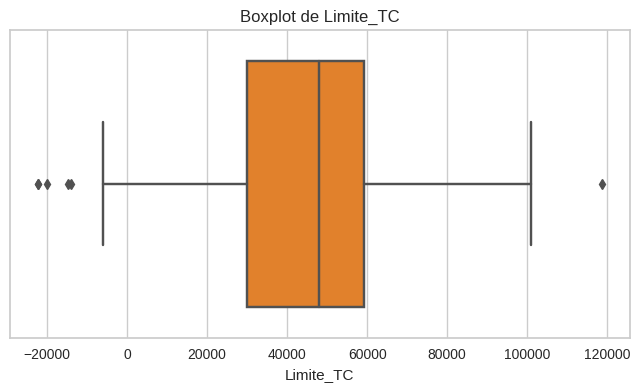

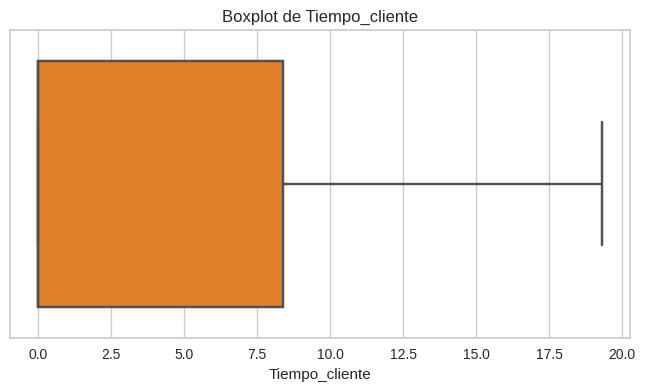

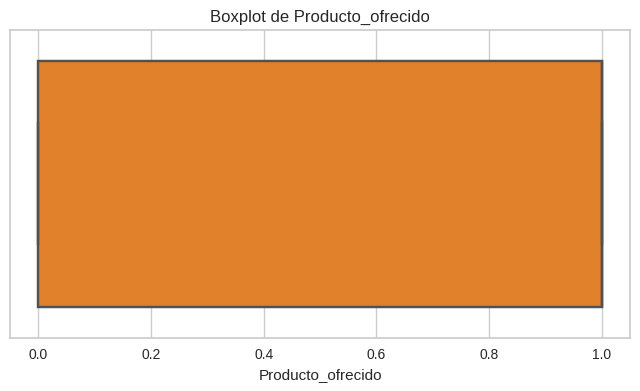


Matriz de Dispersión para Multicolinealidad Visual:


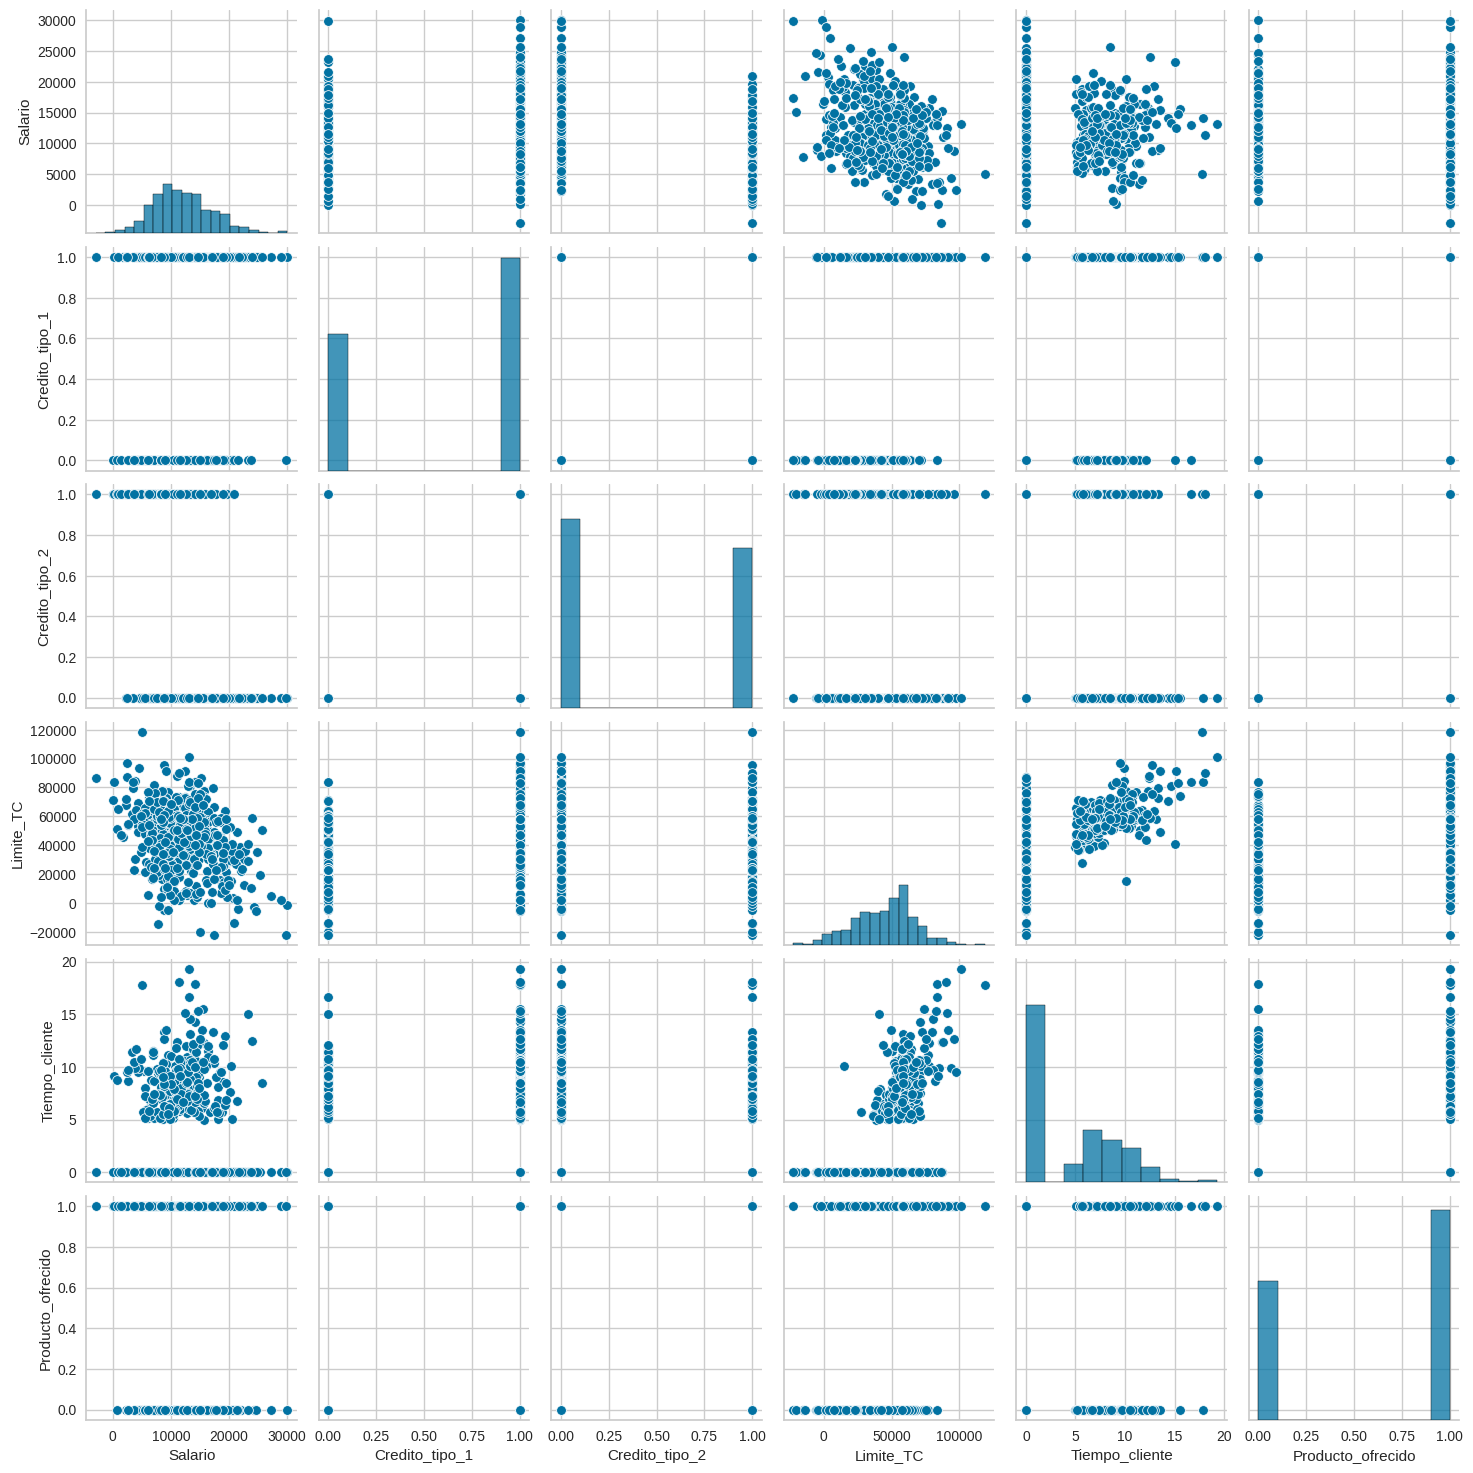

In [ ]:
realizar_eda(df)

In [ ]:
pca = PCA(n_components=2)
df3 = pca.fit_transform(df2)
exp_var_pca = pca.explained_variance_ratio_
print(f"Cada columna tiene el siguiente porcentaje de explicacion respectivamente:{exp_var_pca}")
radios = np.linalg.norm(df3, axis=1)

for i, radio in enumerate(radios):
    print(f"Dato numero {i + 1} transformado: {radio}")

Cada columna tiene el siguiente porcentaje de explicacion respectivamente:[0.95222838 0.04777159]
Dato numero 1 transformado: 20416.71020588796
Dato numero 2 transformado: 22322.429845013437
Dato numero 3 transformado: 18874.542139404653
Dato numero 4 transformado: 14886.082349519189
Dato numero 5 transformado: 22651.04997852388
Dato numero 6 transformado: 12070.30629418797
Dato numero 7 transformado: 4192.007784701804
Dato numero 8 transformado: 39718.15909151396
Dato numero 9 transformado: 24770.694280151052
Dato numero 10 transformado: 26278.646171034958
Dato numero 11 transformado: 7465.075831422374
Dato numero 12 transformado: 22192.81274598112
Dato numero 13 transformado: 26772.23160114519
Dato numero 14 transformado: 24343.041923713452
Dato numero 15 transformado: 6417.492473218858
Dato numero 16 transformado: 6059.118292069958
Dato numero 17 transformado: 4375.177025408069
Dato numero 18 transformado: 29404.119806022205
Dato numero 19 transformado: 11971.57197257553
Dato numero

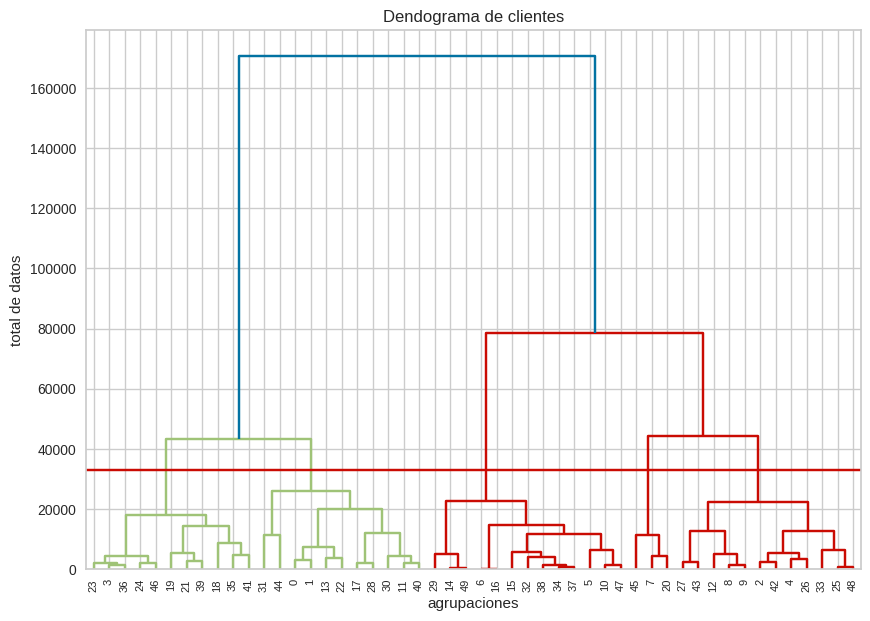

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel('total de datos')
plt.xlabel('agrupaciones')
clusters = shc.linkage(df2,
            method='ward',
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 33000, color = 'r', linestyle = '-')

In [ ]:
for i in range(2,21):
  hc = AgglomerativeClustering(n_clusters = i, affinity = "euclidean", linkage = "ward")
  labels = hc.fit_predict(df2)
  Silueta = metrics.silhouette_score(df2, labels)
  Calinski_Harabasz = metrics.calinski_harabasz_score(df2, labels)
  Davies_Bouldin = metrics.davies_bouldin_score(df2, labels)
  Silueta = round(Silueta, 3)
  Calinski_Harabasz = round(Calinski_Harabasz, 3)
  Davies_Bouldin = round(Davies_Bouldin, 3)
  print(f'k = {i}; silueta = {Silueta}, Calinski-Harabasz = {Calinski_Harabasz}, Davies-Bouldin = {Davies_Bouldin}')

k = 2; silueta = 0.552, Calinski-Harabasz = 98.006, Davies-Bouldin = 0.584
k = 3; silueta = 0.462, Calinski-Harabasz = 102.83, Davies-Bouldin = 0.65
k = 4; silueta = 0.471, Calinski-Harabasz = 93.74, Davies-Bouldin = 0.608
k = 5; silueta = 0.39, Calinski-Harabasz = 104.178, Davies-Bouldin = 0.758
k = 6; silueta = 0.384, Calinski-Harabasz = 98.444, Davies-Bouldin = 0.772
k = 7; silueta = 0.37, Calinski-Harabasz = 94.955, Davies-Bouldin = 0.731
k = 8; silueta = 0.347, Calinski-Harabasz = 96.479, Davies-Bouldin = 0.793
k = 9; silueta = 0.351, Calinski-Harabasz = 98.642, Davies-Bouldin = 0.727
k = 10; silueta = 0.373, Calinski-Harabasz = 101.63, Davies-Bouldin = 0.737
k = 11; silueta = 0.377, Calinski-Harabasz = 101.819, Davies-Bouldin = 0.707
k = 12; silueta = 0.389, Calinski-Harabasz = 103.762, Davies-Bouldin = 0.684
k = 13; silueta = 0.377, Calinski-Harabasz = 105.362, Davies-Bouldin = 0.721
k = 14; silueta = 0.412, Calinski-Harabasz = 109.532, Davies-Bouldin = 0.641
k = 15; silueta = 0

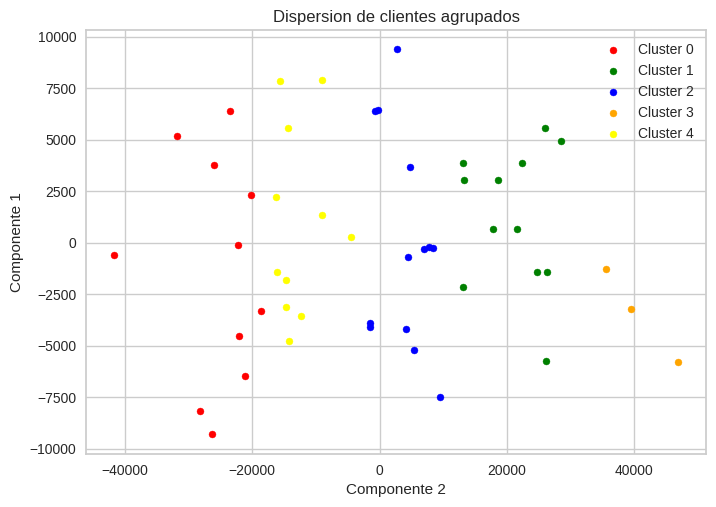

In [ ]:
y_hc2 = hc.fit_predict(df2)

plt.scatter(df3[y_hc2 == 0, 0], df3[y_hc2 == 0, 1], s = 100, marker= '.', c = "red", label = "Cluster 0")
plt.scatter(df3[y_hc2 == 1, 0], df3[y_hc2 == 1, 1], s = 100, marker= '.', c = "green", label = "Cluster 1")
plt.scatter(df3[y_hc2 == 2, 0], df3[y_hc2 == 2, 1], s = 100, marker= '.', c = "blue", label = "Cluster 2")
plt.scatter(df3[y_hc2 == 3, 0], df3[y_hc2 == 3, 1], s = 100, marker= '.', c = "orange", label = "Cluster 3")
plt.scatter(df3[y_hc2 == 4, 0], df3[y_hc2 == 4, 1], s = 100, marker= '.', c = "yellow", label = "Cluster 4")
plt.title("Dispersion de clientes agrupados")
plt.ylabel('Componente 1')
plt.xlabel('Componente 2')



plt.legend()
plt.show()